<h3>Grouping and Aggregating Data</h3>

In [1]:
# import pandas and numpy
import numpy as np
import pandas as pd

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [2]:
# inline graphics
%matplotlib inline

<h3>The split, apply, and combine (SAC)
pattern</h3>

<p>Many data analysis problems utilize a pattern of processing data, known as split-apply-combine.
In this pattern, three steps are taken to analyze data:</p><ol>
    <li> A data set is split into smaller pieces</li>
<li> Each of these pieces are operated upon independently</li>
<li> All of the results are combined back together and presented as a single unit</li></ol>

Split-apply-combine, as implemented in pandas, differs in the scope of the data and
processing. In pandas, all of the data is in memory of a single system. Because of this, it is
limited to that single system’s processing capabilities, but this also makes the data analysis
for that scale of data faster and more interactive in nature.

Splitting in pandas is performed using the .groupby() method of a Series or DataFrame
object, which given one or more index labels and/or column names, will divide the data
based on the values present in the specified index labels and columns.

Once the data is split into groups, one or more of the following three broad classes of
operations is applied:</p>
<ul>
<li>Aggregation: This calculates a summary statistic, such as group means or counts of
the items in each group</li>
<li>Transformation: This performs group or item-specific calculations and returns a set
of like-indexed results</li>
<li>Filtration: This removes entire groups of data based on a group level computation</li></ul>

<img src="data/split_apply_combine.png"></img>

<h3>Split</h3>

Our examination of splitting a pandas objects will be broken into several sections. We will
first load data to use in the examples. Then, we will look at creating a grouping based on
columns, examining properties of a grouping in the process. Next, will be an examination
of accessing the results of the grouping. The last subsection will examine grouping using
index labels, instead of content in columns.

pandas’ Series and DataFrame objects are split into groups using the .groupby()
method. To demonstrate, we will use a variant of the accelerometer sensor data introduced
in the previous chapter. This version of the data adds another column (sensor) that can be
used to specify multiple sensors:

In [3]:
!cat data/sensors.csv

In [4]:
# load the sensors data
sensors = pd.read_csv("data/sensors.csv")
sensors

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
3          1        accel    Z      0.1
4          1        accel    Y      0.4
..       ...          ...  ...      ...
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

[24 rows x 4 columns]

<h3>Grouping by a single column’s values</h3>

The sensor data consists of three categorical variables (sensor, interval, and axis) and
one continuous variable (reading). In pandas, it is possible to group by any single
categorical variable by passing its name to .groupby(). The following groups by the
sensor column:

In [5]:
# group this data by the sensor column / variable
# returns a DataFrameGroupBy object
grouped = sensors.groupby('sensor')
grouped

In [6]:
# get the number of groups that this will create
grouped.ngroups

2

The result of calling .groupby() on DataFrame is not the actual grouped data, but a
DataFrameGroupBy object (SeriesGroupBy when grouping on Series). The actual process
of grouping is a deferred/lazy process in pandas, and at this point, the grouping has not
actually been performed. This object represents an interim description of the grouping to
be performed. This allows pandas to first validate that the grouping description provided
to it is valid, relative to the data before starting processing.

The .groups property will return a Python dictionary whose keys represent the names of
each group (if multiple columns are specified, it is a tuple). The values in the dictionary
are an array of the index labels contained within each respective group:

In [7]:
# what are the groups that were found?
grouped.groups

{'accel': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'),
 'orientation': Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype='int64')}

<h3>Accessing the results of grouping</h3>

The grouped variable can be thought of as a collection of named groups. We will use these
properties, and the following function, to examine many of the results of groupings:

In [8]:
# a helper function to print the contents of the groups
def print_groups (groupobject):
    # loop over all groups, printing the group name
    # and group details
    for name, group in groupobject:
        print (name)
        print (group)

In [9]:
# examine the content of the groups we created
print_groups(grouped)

accel
    interval sensor axis  reading
0          0  accel    Z      0.0
1          0  accel    Y      0.5
2          0  accel    X      1.0
3          1  accel    Z      0.1
4          1  accel    Y      0.4
..       ...    ...  ...      ...
7          2  accel    Y      0.3
8          2  accel    X      0.8
9          3  accel    Z      0.3
10         3  accel    Y      0.2
11         3  accel    X      0.7

[12 rows x 4 columns]
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2
..       ...          ...  ...      ...
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

[12 rows x 4 columns]


The examination of these results gives us some insight into how pandas has performed the
split that we specified. A group has been created for each distinct value in the sensors
column and has been named with that value. The group contains a DataFrame object
whose content is the rows where the sensor value matched the name of the group.

In [10]:
# get how many items are in each group
grouped.size()

sensor
accel          12
orientation    12
dtype: int64

In [11]:
# get the count of items in each column of each group
grouped.count()

             interval  axis  reading
sensor                              
accel              12    12       12
orientation        12    12       12

In [12]:
# get the data in one specific group
grouped.get_group('accel')

    interval sensor axis  reading
0          0  accel    Z      0.0
1          0  accel    Y      0.5
2          0  accel    X      1.0
3          1  accel    Z      0.1
4          1  accel    Y      0.4
..       ...    ...  ...      ...
7          2  accel    Y      0.3
8          2  accel    X      0.8
9          3  accel    Z      0.3
10         3  accel    Y      0.2
11         3  accel    X      0.7

[12 rows x 4 columns]

In [13]:
# get the first three items in each group
grouped.head(3)

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0

In [14]:
# get the last three items in each group
grouped.tail(3)

    interval       sensor axis  reading
9          3        accel    Z      0.3
10         3        accel    Y      0.2
11         3        accel    X      0.7
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

In [15]:
# get the first item in each group
grouped.nth(0)

             interval axis  reading
sensor                             
accel               0    Z      0.0
orientation         0    Z      0.0

In [16]:
# get the 2nd item in each group
grouped.nth(1)

             interval axis  reading
sensor                             
accel               0    Y      0.5
orientation         0    Y      0.1

Grouping can also be performed on multiple columns by passing a list of column names.
The following groups the data by both sensor and axis variables:

In [17]:
sensors

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
3          1        accel    Z      0.1
4          1        accel    Y      0.4
..       ...          ...  ...      ...
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

[24 rows x 4 columns]

In [18]:
# group by both sensor and axis values
mcg = sensors.groupby(['sensor', 'axis'])
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

In [19]:
# get descriptive statistics for each
mcg.describe()

                 interval                            ... reading               \
                    count mean       std  min   25%  ...     min    25%   50%   
sensor      axis                                     ...                        
accel       X         4.0  1.5  1.290994  0.0  0.75  ...     0.7  0.775  0.85   
            Y         4.0  1.5  1.290994  0.0  0.75  ...     0.2  0.275  0.35   
            Z         4.0  1.5  1.290994  0.0  0.75  ...     0.0  0.075  0.15   
orientation X         4.0  1.5  1.290994  0.0  0.75  ...     0.0  0.075  0.15   
            Y         4.0  1.5  1.290994  0.0  0.75  ...     0.1  0.175  0.25   
            Z         4.0  1.5  1.290994  0.0  0.75  ...     0.0  0.000  0.00   

                              
                    75%  max  
sensor      axis              
accel       X     0.925  1.0  
            Y     0.425  0.5  
            Z     0.225  0.3  
orientation X     0.225  0.3  
            Y     0.325  0.4  
            Z     0.00

By default, groups are sorted by their group name in an ascending order. This dataset
already has them in an ascending order, but if you want to prevent sorting during
grouping, use the "sort=False" option.

<p>The examples up to this point, have used DataFrame without any specific indexing (just
the default sequential numerical index). This type of data would actually be very well
suited for a hierarchical index. This can then be used directly to group the data based upon
index label(s).</p><p>
To demonstrate, the following script creates a new DataFrame object with MultiIndex,
consisting of the original sensor and interval columns:</p>

In [20]:
# make a copy of the data and reindex the copy
mi = sensors.copy()
mi

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
3          1        accel    Z      0.1
4          1        accel    Y      0.4
..       ...          ...  ...      ...
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

[24 rows x 4 columns]

In [21]:
mi = mi.set_index(['sensor', 'axis'])
mi

                  interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[24 rows x 2 columns]

In [22]:
mi.index

MultiIndex([(      'accel', 'Z'),
            (      'accel', 'Y'),
            (      'accel', 'X'),
            (      'accel', 'Z'),
            (      'accel', 'Y'),
            (      'accel', 'X'),
            (      'accel', 'Z'),
            (      'accel', 'Y'),
            (      'accel', 'X'),
            (      'accel', 'Z'),
            (      'accel', 'Y'),
            (      'accel', 'X'),
            ('orientation', 'Z'),
            ('orientation', 'Y'),
            ('orientation', 'X'),
            ('orientation', 'Z'),
            ('orientation', 'Y'),
            ('orientation', 'X'),
            ('orientation', 'Z'),
            ('orientation', 'Y'),
            ('orientation', 'X'),
            ('orientation', 'Z'),
            ('orientation', 'Y'),
            ('orientation', 'X')],
           names=['sensor', 'axis'])

Grouping can now be performed using the levels of the hierarchical index. The following
groups by index level 0 (the sensor names):

In [23]:
mi

                  interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[24 rows x 2 columns]

In [24]:
# group by the first level of the index
mig_l1 = mi.groupby(level=0)
print_groups(mig_l1)

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
...               ...      ...
       Y            2      0.3
       X            2      0.8
       Z            3      0.3
       Y            3      0.2
       X            3      0.7

[12 rows x 2 columns]
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2
...                    ...      ...
            Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[12 rows x 2 columns]


Grouping by multiple levels can be performed by passing the levels in a list to
.groupby(). Also, if MultiIndex has names specified for the levels, then these names can
be used instead of integers. The following code groups the two levels of MultiIndex by
their names:

In [25]:
# group by multiple levels of the index
mig_l12 = mi.groupby(level=['sensor', 'axis'])
print_groups(mig_l12)

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

In [26]:
# VS grouping on 2 columns from previous example
mcg = sensors.groupby(['sensor', 'axis'])
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

<h3>Apply</h3>

After the grouping is performed, we have the ability to perform either aggregate
calculations on each group of data resulting in a single value from each group, or to apply
a transformation to each item in a group and return the combined result for each group.
We can also filter groups based on results of expressions to exclude the groups from being
included in the combined results.

<h4>Applying aggregation functions to groups</h4>

<p>pandas allows the application of an aggregation function to each group of data.
Aggregation is performed using the .aggregate() (or in short, .agg()) method of the
GroupBy object. The parameter of .agg() is a reference to a function that is applied to
each group. In the case of DataFrame, the function will be applied to each column.</p><p>As an example, the following code will calculate the mean of the values across each
sensor and axis in the grouping mig_l12:</p>

In [27]:
# calculate the mean for each sensor/axis
mig_l12

In [28]:
print_groups(mig_l12)

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

In [29]:
# calculate the mean for each sensor/axis
mig_l12.agg(np.mean)

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

As .agg() will apply the method to each column in each group, we also calculated the
mean of the interval values (which is not of much interest).

The result of the aggregation will have an identically structured index as the original data.
If you do not want this to happen, you can use the as_index=False option of the
.groupby() method to specify not to duplicate the structure of the index:

In [30]:
# do not create an index matching the original object
sensors.groupby(['sensor', 'axis'], as_index=False).agg(np.mean)

        sensor axis  interval  reading
0        accel    X       1.5     0.85
1        accel    Y       1.5     0.35
2        accel    Z       1.5     0.15
3  orientation    X       1.5     0.15
4  orientation    Y       1.5     0.25
5  orientation    Z       1.5     0.00

In [31]:
# VS This...
sensors.groupby(['sensor', 'axis']).agg(np.mean)

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

<p>Aggregation functions can also be directly passed level parameters to specify which
levels of the index to apply the function.</p>
<p>
Many aggregation functions are built in directly to the GroupBy object to save you some
more typing. Specifically, these functions are (prefixed by gb.):</p>

<pre>gb.agg gb.boxplot gb.cummin gb.describe gb.filter
gb.get_group gb.height gb.last gb.median gb.ngroups
gb.plot gb.rank gb.std gb.transform
gb.aggregate gb.count gb.cumprod gb.dtype gb.first
gb.groups gb.hist gb.max gb.min gb.nth
gb.prod gb.resample gb.sum gb.var
gb.apply gb.cummax gb.cumsum gb.fillna gb.gender
gb.head gb.indices <b>gb.mean</b> gb.name gb.ohlc
gb.quantile gb.size gb.tail gb.weight</pre>

In [32]:
# can simply apply the agg function to the group by object
mig_l12.mean()

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [33]:
print_groups(mig_l12)

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     


Multiple aggregation functions can be simultaneously applied to each group in a single call to .agg() by passing them in a list:

In [34]:
# apply multiple aggregation functions at once
mig_l12.agg([np.sum, np.std])

                 interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

A different function can be applied to each column in each group by passing a Python
dictionary to .agg(), where the keys of the dictionary represent the column name that the
function is to be applied to, and the value is the function. The following demonstrates the
mean of the reading column in each group by return, but for the interval, the column
returns the length of the group:

In [35]:
# apply a different function to each column
mig_l12.agg({'interval' : len, 'reading': np.mean})

                  interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

In [36]:
# apply a different function to each column
mig_l12.agg({'reading': np.mean})

                  reading
sensor      axis         
accel       X        0.85
            Y        0.35
            Z        0.15
orientation X        0.15
            Y        0.25
            Z        0.00

Aggregation can also be performed on specific columns using the [] operator on the
GroupBy object. The following sums only the reading column:

In [37]:
# calculate the mean of the reading column
mig_l12['reading'].mean()

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

<h3>The transformation of group data</h3>

<p>The GroupBy objects provide a .transform() method, which applies a function to each
group and returns either Series or DataFrame that has the following parameters:</p><ul><li>Indexed identically to the concatenation of the indexes in all the groups</li>
<li>The number of rows is equal to the sum of the number of rows in all the groups</li>
<li>Consists of non-noise, nongrouped columns to which pandas has applied the given
    function</li></ul>

In [38]:
# a DataFrame to use for examples
df = pd.DataFrame({ 'Label': ['A', 'C', 'B', 'A', 'C'], 'Values': [0, 1, 2, 3, 4], 'Values2': [5, 6, 7, 8, 9],
'Noise': ['foo', 'bar', 'baz', 'foobar', 'barbaz']})

df

  Label  Values  Values2   Noise
0     A       0        5     foo
1     C       1        6     bar
2     B       2        7     baz
3     A       3        8  foobar
4     C       4        9  barbaz

<p>This DataFrame object has a default index, a Label column that will be used to group the
data, two numerical columns (Values and Values2), and one Noise column that will
demonstrate pandas making an automatic decision to drop columns in transformations that
it considers not appropriate for the specific operation.</p>
<p>First, we group DataFrame by its Label column:</p>

In [39]:
# group by label
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values  Values2   Noise
0     A       0        5     foo
3     A       3        8  foobar
B
  Label  Values  Values2 Noise
2     B       2        7   baz
C
  Label  Values  Values2   Noise
1     C       1        6     bar
4     C       4        9  barbaz


Now, to demonstrate a transformation in process, the following adds the numeric value of
10 to each value (the values in both the Values and Values2 columns):

In [40]:
# add ten to all values in all columns
grouped.transform(lambda x: x + 10)

   Values  Values2
0      10       15
1      11       16
2      12       17
3      13       18
4      14       19

<p>What pandas does here is pass the columns of DataFrame one by one and with only the
rows for the specific group to the function supplied to .transform(). The result, in this
example, is that the Noise column has been dropped in the result, as pandas determines
that + 10 is not a valid operation for that column. Then, the other columns are passed as
Series objects to the method and therefore, they have 10 added to each value.</p><p>To understand what is going on more clearly, we can change the function being passed to
.transform() to write some diagnostic information. The following changes the x + 10
transform to also print what the data, that is being worked upon at each step of the
execution, is:</p>

In [41]:
# a function to print the input before we are adding 10 to it
def xplus10(x):
    print ('Output: ' + str(x))
    print ('Output2: ' + str(x+10))
    return x + 10

In [42]:
print_groups(grouped)

A
  Label  Values  Values2   Noise
0     A       0        5     foo
3     A       3        8  foobar
B
  Label  Values  Values2 Noise
2     B       2        7   baz
C
  Label  Values  Values2   Noise
1     C       1        6     bar
4     C       4        9  barbaz


In [43]:
# transform using xplus10
grouped.transform(xplus10)

Output: 0    0
3    3
Name: Values, dtype: object
Output2: 0    10
3    13
Name: Values, dtype: object
Output: 0    0
3    3
Name: Values, dtype: int64
Output2: 0    10
3    13
Name: Values, dtype: int64
Output: 0    5
3    8
Name: Values2, dtype: int64
Output2: 0    15
3    18
Name: Values2, dtype: int64
Output: 0       foo
3    foobar
Name: Noise, dtype: object
Output: 0    0
3    3
Name: A, dtype: int64
Output2: 0    10
3    13
Name: A, dtype: int64
Output: 2    2
Name: B, dtype: int64
Output2: 2    12
Name: B, dtype: int64
Output: 1    1
4    4
Name: C, dtype: int64
Output2: 1    11
4    14
Name: C, dtype: int64
Output: 0    5
3    8
Name: A, dtype: int64
Output2: 0    15
3    18
Name: A, dtype: int64
Output: 2    7
Name: B, dtype: int64
Output2: 2    17
Name: B, dtype: int64
Output: 1    6
4    9
Name: C, dtype: int64
Output2: 1    16
4    19
Name: C, dtype: int64
Output: 0       foo
3    foobar
Name: A, dtype: object


   Values  Values2
0      10       15
1      11       16
2      12       17
3      13       18
4      14       19

<p>pandas has called our transformation function nine times, one time for every column in
every group (3 x 3), and passed a Series object for each combination of group / rows /
column, and for each of these calls, pandas stores the results and when complete, does a
merge of the results back in to DataFrame (or if the result is a single column, Series) that
is indexed identically to the original data.</p><p>The function passed to .transform() must return Series with the same number of rows
and the same index values. Otherwise, the result will often not be what was expected. As
an example of violating this statement, the following sums each Series object in each
group. The result is a DataFrame object identical to the source (and not an exception or
note that you did something wrong):</p>

In [44]:
print_groups(grouped)

A
  Label  Values  Values2   Noise
0     A       0        5     foo
3     A       3        8  foobar
B
  Label  Values  Values2 Noise
2     B       2        7   baz
C
  Label  Values  Values2   Noise
1     C       1        6     bar
4     C       4        9  barbaz


In [45]:
# sum returns existing as it is applied to each individual item
grouped.transform(lambda x: x.sum())

  Values Values2      Noise
0      3      13  foofoobar
1      5      15  barbarbaz
2      2       7        baz
3      3      13  foofoobar
4      5      15  barbarbaz

<h3>Practical examples of transformation</h3>

<p>A common transformation in statistical analysis, with grouped data, is to replace missing
data within each group with the mean of the non-NaN values in the group. The following
creates DataFrame with a Label categorical variable with two values (‘A‘ and ‘B‘) and a
Values column containing a series of integers but with one value replaced with NaN:</p>

In [46]:
# data to demonstrate replacement on NaN
df = pd.DataFrame({ 'Label': list("ABABAB"), 'Values': [10, 20, 11, np.nan, 12, 22]},
index=['i1', 'i2', 'i3', 'i4', 'i5', 'i6'])

df

   Label  Values
i1     A    10.0
i2     B    20.0
i3     A    11.0
i4     B     NaN
i5     A    12.0
i6     B    22.0

Now, we group the data by Label, resulting in the following groups:

In [47]:
# show the groups in the data based upon Label
grouped = df.groupby('Label')
print_groups(grouped)

A
   Label  Values
i1     A    10.0
i3     A    11.0
i5     A    12.0
B
   Label  Values
i2     B    20.0
i4     B     NaN
i6     B    22.0


We can calculate the mean of each group using the GroupBy object’s .mean() method. We
can use this result to later verify that we did this transformation correctly:

In [48]:
# calculate the mean of the two groups
grouped.mean()

       Values
Label        
A        11.0
B        21.0

The default operation of .mean() skips NaN in its calculation for the B group. However,
suppose that we need the B group to have all NaN values filled, as other code we use may
take offense to the NaN value, so we could replace it with the mean of the group (which
should not affect group level mean calculations). This can be done with the following
code:

In [49]:
df

   Label  Values
i1     A    10.0
i2     B    20.0
i3     A    11.0
i4     B     NaN
i5     A    12.0
i6     B    22.0

In [50]:
# use transform to fill the NaNs with the mean of the group
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

    Values
i1    10.0
i2    20.0
i3    11.0
i4    21.0
i5    12.0
i6    22.0

<p>Here is where I have had trouble with pandas and have also seen others have problems.
This result appears odd at first glance because of the following reasons:</p><ul><li>It does not have a Label column</li>
<li>It has returned the Series object when we passed DataFrame to it</li>
   <li> It does not provide an explicit statement of which values in which group have been</li>
    filled with the mean of the group</li></ul>

<p>On the first two points, our original DataFrame had two columns, one of which was used
in the grouping process. This column is not passed to the .transform() method, and in
this scenario, the only column processed is Values. Upon applying the .transform()
method on each group, pandas merges the results, which are all Series objects, into a
single Series object.</p><p>With respect to the third point, we do not know which values in which groups were
changed, but we do know the index in the original data, as the index labels are preserved
through the process. This allows us to go back to the original data and fill in the NaN
values in the original DataFrame:</p>

In [51]:
# Show the new and old values
df['Transformed_Values_Column'] = filled_NaNs
df

   Label  Values  Transformed_Values_Column
i1     A    10.0                       10.0
i2     B    20.0                       20.0
i3     A    11.0                       11.0
i4     B     NaN                       21.0
i5     A    12.0                       12.0
i6     B    22.0                       22.0

<h4>Note</h4>
<p>The .transform() method does not change the original data or the data in the group that
is being applied to. Index labels are preserved, so you can go back and relate the results to
the original data or any of the groups. If you want to patch this data, you will need to
align/merge the results with the original data or grouped data. These changes, then, do not
    affect already calculated groups or the results for the apply step.</p><p>
Another common and practical example, is that of using .transform() in statistical
analysis and is the process of normalizing multiple groups of data to have a mean of 0 and
    a standard deviation of 1, also referred to as creating a normalized z score of the data.</p><p>
To demonstrate normalizing groups into z scores, we will create a series of data that does
not have a mean of 0, or a standard deviation of 1. The following code creates a series of
normally distributed values with a 0.5 mean and a standard deviation of 2, is indexed by
day, and calculates a rolling mean of these values across 90 periods (roughly one quarter
    of a year):</p>

In [52]:
# Draw random samples from a normal (Gaussian) distribution.
np.random.seed(123456)
values = np.random.normal(0.5, 2, 365*3)
values

array([ 1.4382246 , -0.06572669, -2.51811701, ...,  1.40436124,
       -0.10668701,  1.79675573])

In [53]:
# 3 Years of dates
dates = pd.date_range('2011-01-01', periods=365*3)

In [54]:
# generate a rolling mean time series
data = pd.Series(values, dates)
data

2011-01-01    1.438225
2011-01-02   -0.065727
2011-01-03   -2.518117
2011-01-04   -1.771265
2011-01-05    2.924224
                ...   
2013-12-26   -0.276625
2013-12-27    0.259735
2013-12-28    1.404361
2013-12-29   -0.106687
2013-12-30    1.796756
Freq: D, Length: 1095, dtype: float64

In [55]:
# generate a rolling mean time series
rolling = data.rolling(100,100).mean()
rolling

2011-01-01         NaN
2011-01-02         NaN
2011-01-03         NaN
2011-01-04         NaN
2011-01-05         NaN
                ...   
2013-12-26    0.811402
2013-12-27    0.835961
2013-12-28    0.850998
2013-12-29    0.842293
2013-12-30    0.848419
Freq: D, Length: 1095, dtype: float64

In [56]:
# Drop NaN
rolling = data.rolling(100,100).mean().dropna()
rolling

2011-04-10    0.073603
2011-04-11    0.057313
2011-04-12    0.089255
2011-04-13    0.133248
2011-04-14    0.175876
                ...   
2013-12-26    0.811402
2013-12-27    0.835961
2013-12-28    0.850998
2013-12-29    0.842293
2013-12-30    0.848419
Freq: D, Length: 996, dtype: float64

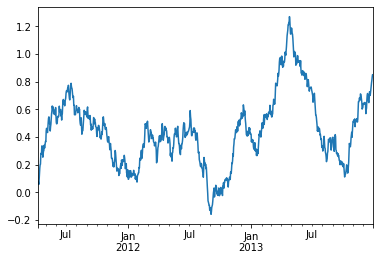

In [57]:
# visualize the series
rolling.plot();

In [58]:
groups = rolling.groupby(lambda x: x.year)
groups

In [59]:
groups.agg([np.mean, np.std])

          mean       std
2011  0.454233  0.171988
2012  0.286874  0.181930
2013  0.599933  0.276009

<p>The mean is definitely not 0, nor is the standard deviation equal to 1.</p><p>
To scale each group into a z score (mean = 0, std = 1), we can use the following function
and apply it to each group:</p>

In [66]:
# normalize to the z-score
zscore = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(lambda x: x.year).transform(zscore)
normed.groupby(lambda x: x.year).agg([np.mean, np.std])

              mean  std
2011 -6.928459e-17  1.0
2012  4.246755e-17  1.0
2013 -3.278818e-16  1.0

<p>This confirms our grouping and scaling to a standard z score.</p><p>
As they say, a picture is worth a thousand words. The following code plots the original
and normalized values against each other:</p>

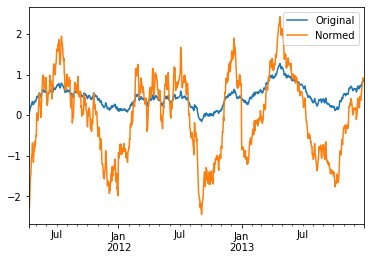

In [67]:
# plot original vs normalize
compared = pd.DataFrame({ 'Original': rolling, 'Normed': normed })
compared.plot();

In [68]:
rolling, normed

(2011-04-10    0.073603
 2011-04-11    0.057313
 2011-04-12    0.089255
 2011-04-13    0.133248
 2011-04-14    0.175876
                 ...   
 2013-12-26    0.811402
 2013-12-27    0.835961
 2013-12-28    0.850998
 2013-12-29    0.842293
 2013-12-30    0.848419
 Freq: D, Length: 996, dtype: float64,
 2011-04-10   -2.213125
 2011-04-11   -2.307837
 2011-04-12   -2.122115
 2011-04-13   -1.866325
 2011-04-14   -1.618471
                 ...   
 2013-12-26    0.766167
 2013-12-27    0.855145
 2013-12-28    0.909627
 2013-12-29    0.878089
 2013-12-30    0.900283
 Freq: D, Length: 996, dtype: float64)

<p>We can see that the initial data had a tighter curve and was mostly above 0 (a mean of
0.5), as we would expect from the given distribution. The normalized data has a wider
range of values, as we moved the mean from 0.5 to 0.0 and also made the standard
deviation larger.</p><p>
We can perform one more check to see whether we did the math correctly. In a normal
distribution, 64.2 percent of the data points should be within a standard deviation of 1:</p>

In [69]:
# check the distribution % within one std
# should be roughly 64.2%
normed_in1std = normed[np.abs(normed) <= 1.0].count()
normed_in1std

646

In [70]:
float(normed_in1std) / len(normed)

0.6485943775100401

<h3>Filtering groups</h3>

<p>The pandas GroupBy object provides a .filter() method, which can be used to make
group level decisions on whether or not the entire group is included in the result after the
combination. The function passed to .filter() should return True if the group is to be
included in the result and False to exclude it.</p><p>
To demonstrate several scenarios, we will use the following DataFrame:</p>

In [71]:
# data for our examples
df = pd.DataFrame({'Label': list('AABCCC'), 'Values': [1, 2, 3, 4, np.nan, 8]})
df

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0
3     C     4.0
4     C     NaN
5     C     8.0

The first demonstration will drop groups that do not have a minimum number of items.
Specifically, if they only have one item or less, they will be omitted (therefore, only
selecting groups with Label A and C):

In [72]:
# drop groups with one or fewer non-NaN values
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
3     C     4.0
4     C     NaN
5     C     8.0

Notice that there is a subtle difference when it comes to using .filter() as compared to
.translate(). The data passed to the function specified in the call to .filter() is passed
to the columns specified in the .groupby() method. Therefore, in this example, it is
necessary to reference the Values column. This can cause some subtle bugs if you forget
to take this into account.

The following will omit groups that do not have all values supplied (which is the C group):

The following will select groups that have a mean that is over a particular threshold, larger
than the means of all of the groups (basically, a group of data that has exceptional
behavior as compared to the whole—in this case, the C group):

In [74]:
# select groups with a mean of 2.0 or greater
grouped = df.groupby('Label')
mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - mean) > 2.0
df.groupby('Label').filter(f)

  Label  Values
3     C     4.0
4     C     NaN
5     C     8.0

The final example demonstrates that instead of dropping a group, the use of the
dropna=False parameter allows the return of the offending groups, but with all their
values replaced with NaN. This is useful if you want to determine which items have been
omitted:

In [75]:
# replace values in a group where the # of items is <= 1
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f, dropna=False)

  Label  Values
0     A     1.0
1     A     2.0
2   NaN     NaN
3     C     4.0
4     C     NaN
5     C     8.0

<h3>Discretization and Binning</h3>

<p>Although not directly using grouping constructs, in a chapter on grouping, it is worth
explaining the process of discretization of continuous data. Discretization is a means of
slicing up continuous data into a set of “bins”, where each bin represents a range of the
continuous sample and the items are then placed into the appropriate bin—hence the term
“binning”. Discretization in pandas is performed using the pd.cut() and pd.qcut()
functions.</p><p>
We will look at discretization by generating a large set of normally distributed random
numbers and cutting these numbers into various pieces and analyzing the contents of the
bins. The following generates 10000 numbers and reports the mean and standard
deviation, which we expect to approach 0 and 1 as the sample size gets larger:</p>

In [78]:
# generate 10000 normal random #'s
np.random.seed(123456)
dist = np.random.normal(size = 10000)
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

In [79]:
len(dist)

10000

In [80]:
# show the mean and std
"{0} {1}".format(dist.mean(), dist.std())

'-0.002863324040906651 1.008716203199891'

The following cuts the data into five bins evenly spread across the values in the sample:

In [88]:
# split the data into 5 bins
bins = pd.cut(dist, 5)
bins

[(-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-2.077, -0.633], (0.81, 2.254], ..., (-2.077, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, interval[float64]): [(-3.528, -2.077] < (-2.077, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

<p>The resulting bins object is a type of pandas variable known as Categorical. A
categorical variable that is a result of pd.cut() consists of a set of labels and an index that
describes how the data has been split.</p><p>
The .categories property will return the index and describe the intervals that pandas
decided upon</p>

In [89]:
# show the categories in the bins
bins.categories

IntervalIndex([(-3.528, -2.077], (-2.077, -0.633], (-0.633, 0.81], (0.81, 2.254], (2.254, 3.698]],
              closed='right',
              dtype='interval[float64]')

Each item in the index represents the range of values that the data has been mapped into.
As previously stated, the width of the bins is determined by evenly dividing the data into
five equal intervals, with the caveat that pandas automatically increases the overall range
by 0.1 percent to ensure that all points are included. To exemplify, we can verify the
calculated ranges as follows:

In [96]:
# demonstrate the math to calculate the bins
min = dist.min()
max = dist.max()
delta = max - min
iwidth = delta/5
extra = delta*0.001
intervals = np.arange(min, max + extra, iwidth)
intervals[0] -= delta*0.001
intervals

array([-3.52809473, -2.07714421, -0.63341235,  0.81031951,  2.25405137,
        3.69778323])

The .codes property is an array that specifies which of the bins (intervals) each item has
been assigned:

In [97]:
# codes tells us which bin each item is in
bins.codes

array([2, 2, 1, ..., 2, 1, 2], dtype=int8)

The notation for the intervals follows standard mathematical intervals where a parenthesis
represents that the end is open while square brackets are closed. Closed ends include
values at that exact number. By default, pandas closes the right-hand side of intervals. The
closed end can be moved to the left-hand side of the interval using the right=False option
in pd.cut():

In [98]:
# move the closed side of the interval to the left
pd.cut(dist, 5, right=False).categories

IntervalIndex([[-3.521, -2.077), [-2.077, -0.633), [-0.633, 0.81), [0.81, 2.254), [2.254, 3.705)],
              closed='left',
              dtype='interval[float64]')

The following generates 50 ages between 6 and 45:

In [99]:
# generate 50 ages between 6 and 45
np.random.seed(123456)
ages = np.random.randint(6, 45, 50)
ages

array([ 7, 33, 38, 29, 42, 14, 16, 16, 18, 17, 26, 28, 44, 40, 20, 12,  8,
       10, 36, 29, 26, 26, 11, 29, 42, 17, 41, 35, 22, 40, 24, 21, 38, 33,
       26, 23, 16, 34, 26, 20, 18, 42, 27, 13, 37, 37, 10,  7, 10, 23])

We can specify specific ranges for the bins by passing them in an array where the extent of
each bin is specified by each set of adjacent integers. The following cuts the data into the
specified bins and reports the distribution of the ages to each bin using the .describe()
method of the pd.cut() result:

In [101]:
# cut into ranges and then get descriptive stats
ranges = [6, 12, 18, 35, 50]
agebins = pd.cut(ages, ranges)
agebins.describe()

            counts  freqs
categories               
(6, 12]          8   0.16
(12, 18]         9   0.18
(18, 35]        21   0.42
(35, 50]        12   0.24

In [102]:
agebins

[(6, 12], (18, 35], (35, 50], (18, 35], (35, 50], ..., (35, 50], (6, 12], (6, 12], (6, 12], (18, 35]]
Length: 50
Categories (4, interval[int64]): [(6, 12] < (12, 18] < (18, 35] < (35, 50]]

To specify a name for each bin that is different than the standard mathematical notation,
use the labels property:

In [104]:
# add names for the bins
ranges = [6, 12, 18, 35, 50]
myLabels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged']
agebins = pd.cut(ages, ranges, labels=myLabels)
agebins.describe()

             counts  freqs
categories                
Youth             8   0.16
Young Adult       9   0.18
Adult            21   0.42
Middle Aged      12   0.24

<p>This is not only convenient here, but also when plotting the bins, as pandas will pass the
bin names to be plotted on a chart.</p><p>
Data can also be sliced according to specified quantiles using pd.qcut(). This is the
process of placing values into bins such that each bin has the same number of items. To do
this, the ranges of the quantiles must be determined during the process, so that the
distribution is even.</p><p>
The following code splits the random values from earlier into 5 quantile bins, where each
bin will have the same number of items allocated to it:</p>

In [105]:
# cut into quantiles
# 5 bins with an equal quantity of items
qbin = pd.qcut(dist, 5)

# this will tell us the range of values in each quantile
qbin.describe()

                  counts  freqs
categories                     
(-3.522, -0.861]    2000    0.2
(-0.861, -0.241]    2000    0.2
(-0.241, 0.261]     2000    0.2
(0.261, 0.866]      2000    0.2
(0.866, 3.698]      2000    0.2

Instead of an integer number of bins, you can also specify your own quantile ranges. The
following allocates ranges based on +/- 3, 2, and 1 standard deviations. As this is normally
distributed data, we would expect 0.1 percent, 2.1 percent, 13.6 percent, and 34.1 percent
of the values on each side of the mean:

In [106]:
# make the quantiles at the +/- 3, 2 and 1 std deviations
quantiles = [0,0.001,
0.021,
0.5-0.341,
0.5,
0.5+0.341,
1.0-0.021,
1.0-0.001,
1.0]
qbin = pd.qcut(dist, quantiles)
# this data should be a perfect normal distribution
qbin.describe()

                    counts  freqs
categories                       
(-3.522, -3.131]        10  0.001
(-3.131, -2.056]       200  0.020
(-2.056, -1.033]      1380  0.138
(-1.033, -0.00363]    3410  0.341
(-0.00363, 1.011]     3410  0.341
(1.011, 2.043]        1380  0.138
(2.043, 3.062]         200  0.020
(3.062, 3.698]          10  0.001

In [ ]:
dd